## model fire distribution as a gaussian (just as an example - ofc it's a silly distribution)

In [17]:
import numpy as np

In [40]:
N_CELLS = 100
x, y = np.meshgrid(np.linspace(-1,1,N_CELLS), np.linspace(-1,1,N_CELLS)) #100x100 cells
d = np.sqrt(x*x+y*y)
sigma, mu = 1.0, 0.0
temp_mat = np.exp(-( (d-mu)**2 / ( 2.0 * sigma**2 ) ) )

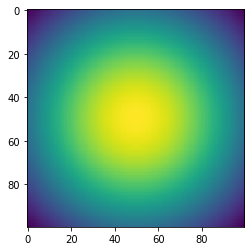

In [41]:
import matplotlib.pyplot as plt
plt.imshow(temp_mat)

## Define mapping from the world frame to the discretized cell frame

In [156]:
# taken from: https://www.researchgate.net/publication/224239584_Rectilinear_coordinate_frames_for_Deep_sea_navigation
import math
from math import cos

class Space:
    
    def __init__(self, origin):
        self.lat0 = origin[0]
        self.lon0 = origin[1]
        
        lat0rad = math.radians(self.lat0)
        self.mdeglon = (111415.13 * cos(lat0rad)
                        - 94.55 * cos(3.0*lat0rad)
                        - 0.12 * cos(5.0*lat0rad) )
        
        lat0rad = math.radians(self.lat0)
        self.mdeglat = (111132.09 - 566.05 * cos(2.0*lat0rad)
                        + 1.20 * cos(4.0*lat0rad)
                        - 0.002 * cos(6.0*lat0rad))
        
        
    def latlon2xy(self, lat, lon):
        x = (lon-self.lon0) * self.mdeglon
        y = (lat-self.lat0) * self.mdeglat
        return (x, y)
    
    def xy2latlon(self, x, y):
        lon = x/self.mdeglon + self.lon0;
        lat = y/self.mdeglat + self.lat0;
        return (lat, lon)


In [154]:
# sanity check
sp = Space(origin=(37.531553, -121.882767))

point1 = (37.331353, -121.882767)
local = sp.latlon2xy(*point1) 
sp.xy2latlon(*local) == point1

True

## Generate trajectory

In [47]:
traj = []
step = 10 # [grid step of 10m]
for x in range(0,N_CELLS,step):
    traj.append((x,0))
    traj.append((x,100))
    traj.append((x+step/2,100))
    traj.append((x+step/2,0))

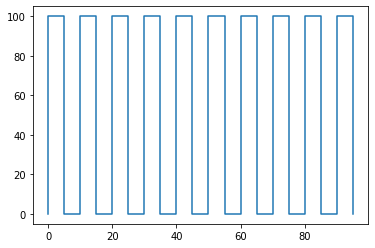

In [61]:
x_list = [p[0] for p in traj]
y_list = [p[1] for p in traj]
plt.plot(x_list, y_list)

In [155]:
#get trajectory in global frame
traj_global = list(map(lambda p: sp.xy2latlon(*p), traj))

traj_global

[(37.531553, -121.882767),
 (37.53245402145403, -121.882767),
 (37.53245402145403, -121.8827104329287),
 (37.531553, -121.8827104329287),
 (37.531553, -121.88265386585739),
 (37.53245402145403, -121.88265386585739),
 (37.53245402145403, -121.8825972987861),
 (37.531553, -121.8825972987861),
 (37.531553, -121.8825407317148),
 (37.53245402145403, -121.8825407317148),
 (37.53245402145403, -121.8824841646435),
 (37.531553, -121.8824841646435),
 (37.531553, -121.88242759757219),
 (37.53245402145403, -121.88242759757219),
 (37.53245402145403, -121.88237103050089),
 (37.531553, -121.88237103050089),
 (37.531553, -121.8823144634296),
 (37.53245402145403, -121.8823144634296),
 (37.53245402145403, -121.8822578963583),
 (37.531553, -121.8822578963583),
 (37.531553, -121.88220132928699),
 (37.53245402145403, -121.88220132928699),
 (37.53245402145403, -121.88214476221569),
 (37.531553, -121.88214476221569),
 (37.531553, -121.88208819514439),
 (37.53245402145403, -121.88208819514439),
 (37.532454021